In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


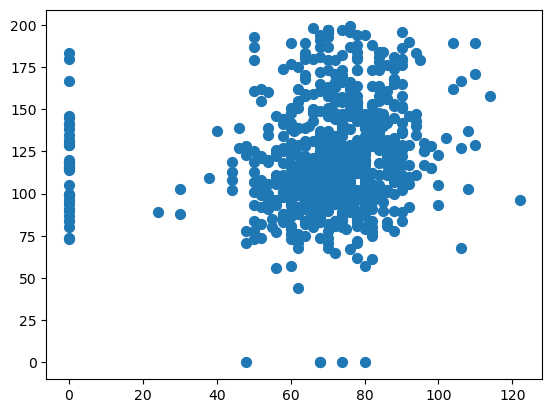

In [13]:
plt.scatter(dataset['BloodPressure'], dataset['Glucose'], s = 50)
plt.show() #mengisi grafik yang diwakili oleh titik2

In [14]:
data = np.asarray(dataset[['BloodPressure', 'Glucose']])
print(data) # merubah dalam bentuk array

[[ 72 148]
 [ 66  85]
 [ 64 183]
 ...
 [ 72 121]
 [ 60 126]
 [ 70  93]]


In [15]:
import scipy.cluster.hierarchy as sch 
# untuk menganalisis cluster termasuk algoritma hirarki

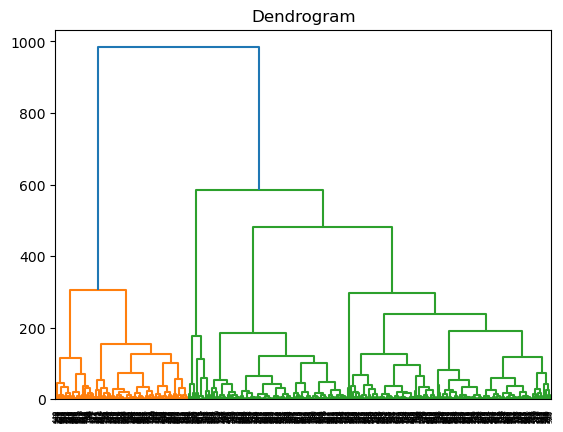

In [16]:
plt.title('Dendrogram')
dendrogam = sch.dendrogram(sch.linkage(data, method = 'ward')) 
# dendr0gram adalah pustaka dari scipy yang berfungsi untuk menggambarkan grafik dari cluster2
# ward untuk membuat hubungan, bagian dari fungsi linkage

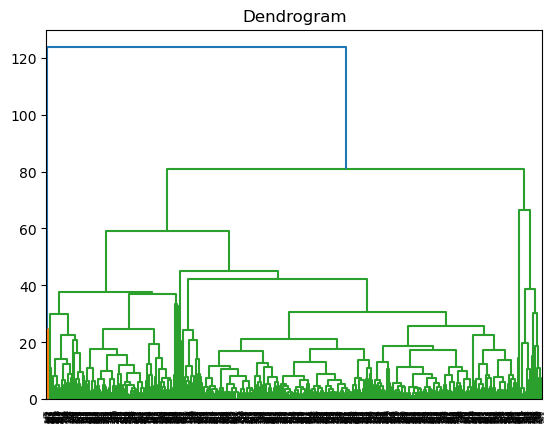

In [17]:
plt.title('Dendrogram')
dendrogam = sch.dendrogram(sch.linkage(data, method = 'average'))
# average adalah pembagian hubungan dari clusternya, 

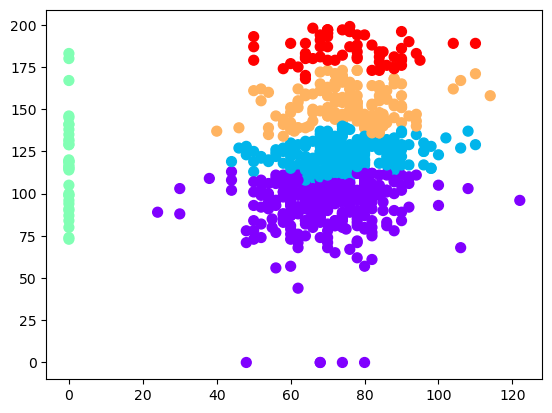

In [18]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5)
output_euclidean = ac.fit_predict(data)

plt.scatter(data[:,0] ,data[:,1],c = output_euclidean, s = 50, cmap = 'rainbow')
plt.show()
# cluster = 5 adalah objek yang dibuat 5
# scatter 

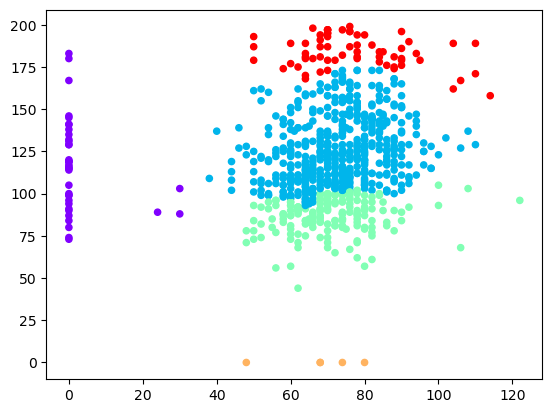

In [19]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage = 'complete')
output = ac.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output, s = 20, cmap = 'rainbow')
plt.show()

### Evaluasi Model

In [20]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(data,output))
print(davies_bouldin_score(data, output_euclidean))
# kalau dibawah 0,5 adanya salah pengaplikasian normanya diatas 0,5
# bouldin score adalah pengefektifan dari score 
# jika gap nya berbeda berarti nanti di outputnya ada masalah 

0.6340500993348981
0.8264363425439546


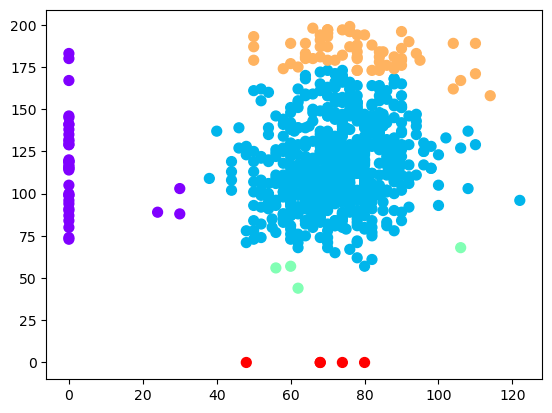

In [21]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'manhattan', linkage = 'average')
output_mav = ac.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = output_mav, s = 50, cmap = 'rainbow')
plt.show()
# afinity manhatan adalah pengukuran jarak 

### Evaluasi #2

In [22]:
from sklearn.metrics import davies_bouldin_score

print(davies_bouldin_score(data,output))
print(davies_bouldin_score(data, output_euclidean))
print(davies_bouldin_score(data,output_mav))
# range nya tetap di 0,7 berarti pengaplikasian sudah baik 

0.6340500993348981
0.8264363425439546
0.6318172959011931
